<a href="https://colab.research.google.com/github/padolekrushna/Face_Recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=0da3b692766872fda2ef4235fd82cdc6c9405f01fc5374ca764d979542048607
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!mkdir known
!mkdir unknown

processing Anand_Mahindra.jpg
processing Official_portrait_of_the_Prime_Minister_Narendra_Modi,_November_2020_(cropped).jpg


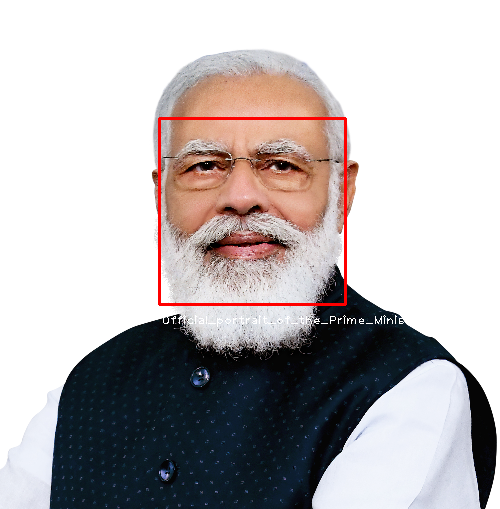

processing Mukesh_Ambani.jpg
processing Elon_Musk_2015.jpg


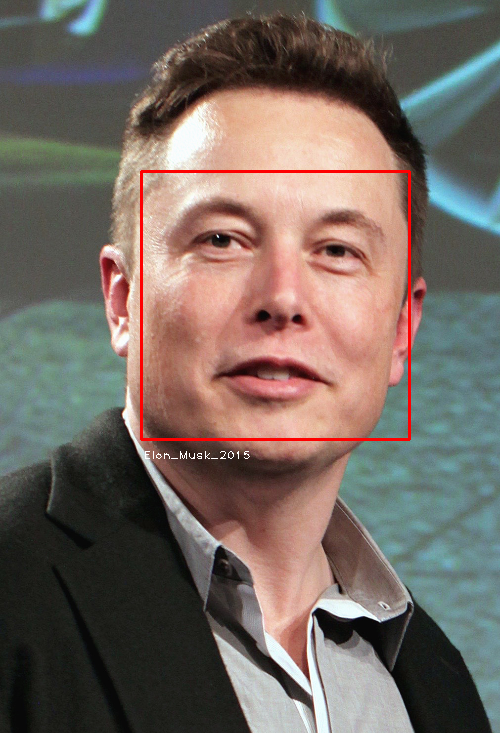

processing RatanTata.jpg


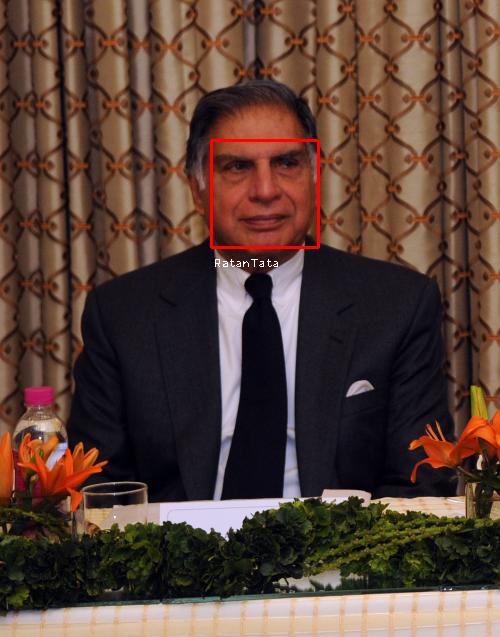

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])


unknown_dir = 'unknown'

for file in os.listdir(unknown_dir):
  print("processing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      names = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top),(right, bottom),(0, 0, 255), 2)
      cv2.putText(img, names, (left+2, bottom+20),cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
      cv2_imshow(img)


  #print(results)